## Introduction

In this notebook, we are going to explore how the 3 point shot has evolved over years, how scoring has increased/decreased from its usage, and so on.

We will first start with the basic introduction on 'final_data.csv' - or whatever you named the data file! Let's first import and install all the necessary packages/libraries.

For a quick disclaimer, there are 3 data sets that I am going to be using for this notebook: 'final_data_2022.csv' - downloaded from the kaggle website; 'final_data_2023.csv' - added the 2023 all star data to 'final_data_2022.csv'; 'final_data_2024.csv' adds on the 2024 all star data to 'final_data_2023.csv'. 

In [2]:
# importing the necessary packages/libraries for the analysis.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

As for this introduction, we will look into all 3 data sets to see if there is any significant change from the past 3 years.

Let's start with the given data set:

In [3]:
nba_all_stars_22 = pd.read_csv("final_data_2022.csv")
nba_all_stars_22.head(10)

,first,last,team,year,games_played,min,fgm,fga,fg3m,fg3a,...,reb,ast,stl,blk,turnover,pf,pts,fg_pct,fg3_pct,ft_pct
0,Julius,Erving,PHI,1980,82.0,35:02:00,9.68,18.59,0.05,0.22,...,8.01,4.44,2.62,1.73,3.40,2.84,24.56,0.521,0.220,0.787
1,Eddie,Johnson,ATL,1980,75.0,35:55:00,7.64,15.16,0.08,0.32,...,2.39,5.47,1.54,0.11,2.70,2.53,19.08,0.504,0.249,0.784
2,Artis,Gilmore,CHI,1980,81.0,34:31:00,6.67,9.93,0.00,0.00,...,10.06,2.15,0.77,2.43,3.31,3.58,17.89,0.672,0.000,0.706
3,Reggie,Theus,CHI,1980,81.0,34:20:00,6.58,13.38,0.22,1.09,...,3.56,5.41,1.73,0.28,3.65,3.14,18.84,0.492,0.203,0.808
4,Larry,Bird,BOS,1980,82.0,39:30:00,8.77,18.33,0.24,0.92,...,10.91,5.50,2.61,0.84,3.69,2.91,21.23,0.478,0.266,0.863
5,Robert,Parish,BOS,1980,82.0,28:01:00,7.74,14.22,0.00,0.01,...,9.48,1.77,1.10,3.00,2.41,3.78,18.93,0.545,0.000,0.710
6,Nate,Archibald,BOS,1980,80.0,35:15:00,4.78,9.58,0.00,0.09,...,2.20,7.73,1.24,0.22,3.61,2.50,13.83,0.499,0.000,0.816
7,Micheal,Ray Richardson,NYK,1980,78.0,40:06:00,6.59,14.13,0.29,1.39,...,6.90,7.99,3.66,0.42,3.67,3.27,16.31,0.466,0.212,0.666
8,Marques,Johnson,MIL,1980,76.0,33:26:00,8.37,15.17,0.00,0.13,...,6.79,4.54,1.50,0.55,2.59,2.58,20.28,0.552,0.000,0.702
9,Bobby,Jones,PHI,1980,81.0,25:15:00,5.02,9.32,0.00,0.04,...,5.37,2.79,1.39,0.99,1.76,2.75,13.53,0.539,0.000,0.813


In [4]:
nba_all_stars_22.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   first         1003 non-null   object 
 1   last          1003 non-null   object 
 2   team          1003 non-null   object 
 3   year          1003 non-null   int64  
 4   games_played  1002 non-null   float64
 5   min           1002 non-null   object 
 6   fgm           1002 non-null   float64
 7   fga           1002 non-null   float64
 8   fg3m          1002 non-null   float64
 9   fg3a          1002 non-null   float64
 10  ftm           1002 non-null   float64
 11  fta           1002 non-null   float64
 12  oreb          1002 non-null   float64
 13  dreb          1002 non-null   float64
 14  reb           1002 non-null   float64
 15  ast           1002 non-null   float64
 16  stl           1002 non-null   float64
 17  blk           1002 non-null   float64
 18  turnover      1002 non-null 

With 2022 out of the way, let's move the next year (2023):

In [5]:
# compare to the actual 2023 NBA All-Star FG3As
nba_all_stars_23 = pd.read_csv("final_data_2023.csv")
nba_all_stars_23.head(10)

,first,last,team,year,games_played,min,fgm,fga,fg3m,fg3a,...,reb,ast,stl,blk,turnover,pf,pts,fg_pct,fg3_pct,ft_pct
0,Julius,Erving,PHI,1980,82.0,35:02:00,9.68,18.59,0.05,0.22,...,8.01,4.44,2.62,1.73,3.40,2.84,24.56,0.521,0.220,0.787
1,Eddie,Johnson,ATL,1980,75.0,35:55:00,7.64,15.16,0.08,0.32,...,2.39,5.47,1.54,0.11,2.70,2.53,19.08,0.504,0.249,0.784
2,Artis,Gilmore,CHI,1980,81.0,34:31:00,6.67,9.93,0.00,0.00,...,10.06,2.15,0.77,2.43,3.31,3.58,17.89,0.672,0.000,0.706
3,Reggie,Theus,CHI,1980,81.0,34:20:00,6.58,13.38,0.22,1.09,...,3.56,5.41,1.73,0.28,3.65,3.14,18.84,0.492,0.203,0.808
4,Larry,Bird,BOS,1980,82.0,39:30:00,8.77,18.33,0.24,0.92,...,10.91,5.50,2.61,0.84,3.69,2.91,21.23,0.478,0.266,0.863
5,Robert,Parish,BOS,1980,82.0,28:01:00,7.74,14.22,0.00,0.01,...,9.48,1.77,1.10,3.00,2.41,3.78,18.93,0.545,0.000,0.710
6,Nate,Archibald,BOS,1980,80.0,35:15:00,4.78,9.58,0.00,0.09,...,2.20,7.73,1.24,0.22,3.61,2.50,13.83,0.499,0.000,0.816
7,Micheal,Ray Richardson,NYK,1980,78.0,40:06:00,6.59,14.13,0.29,1.39,...,6.90,7.99,3.66,0.42,3.67,3.27,16.31,0.466,0.212,0.666
8,Marques,Johnson,MIL,1980,76.0,33:26:00,8.37,15.17,0.00,0.13,...,6.79,4.54,1.50,0.55,2.59,2.58,20.28,0.552,0.000,0.702
9,Bobby,Jones,PHI,1980,81.0,25:15:00,5.02,9.32,0.00,0.04,...,5.37,2.79,1.39,0.99,1.76,2.75,13.53,0.539,0.000,0.813


In [6]:
nba_all_stars_23.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   first         1030 non-null   object 
 1   last          1030 non-null   object 
 2   team          1030 non-null   object 
 3   year          1030 non-null   int64  
 4   games_played  1029 non-null   float64
 5   min           1029 non-null   object 
 6   fgm           1029 non-null   float64
 7   fga           1029 non-null   float64
 8   fg3m          1029 non-null   float64
 9   fg3a          1029 non-null   float64
 10  ftm           1029 non-null   float64
 11  fta           1029 non-null   float64
 12  oreb          1029 non-null   float64
 13  dreb          1029 non-null   float64
 14  reb           1029 non-null   float64
 15  ast           1029 non-null   float64
 16  stl           1029 non-null   float64
 17  blk           1029 non-null   float64
 18  turnover      1029 non-null 

This marks the end of the basic introduction of 'final_data.csv', we can now move onto the visualizations of the data set and predictions!

## Visualization #1 - Evolution of 3 Pointers Attempted

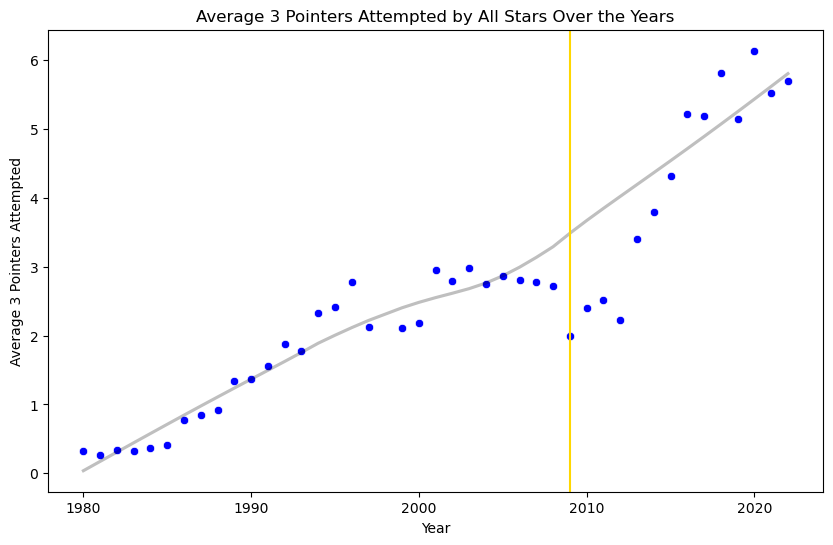

In [7]:
# group by year and calculate the average 3 pointers attempted
avg_3fga_22 = nba_all_stars_22.groupby('year')['fg3a'].mean().reset_index()

# plot the average 3 pointers attempted over the years
plt.figure(figsize=(10, 6))
sns.scatterplot(data=avg_3fga_22, x='year', y='fg3a', color='blue')
sns.regplot(data=avg_3fga_22, x='year', y='fg3a', scatter=False, lowess=True, line_kws={'color': 'black', 'alpha': 0.25}, ci=90)
plt.axvline(x=2009, color='gold')

# labels and title
plt.xlabel('Year')
plt.ylabel('Average 3 Pointers Attempted')
plt.title('Average 3 Pointers Attempted by All Stars Over the Years')

# display the plot
plt.show()

## Visualization #2 - Predicting the Average FG3As for the '23 NBA All Stars

### **2a** - Linear Regression Model

Predicted Average 3 Pointers Attempted for 2023: 5.18
Mean Squared Error on Test Set: 5.005



/Users/vjeyam/miniconda3/envs/mlModels/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


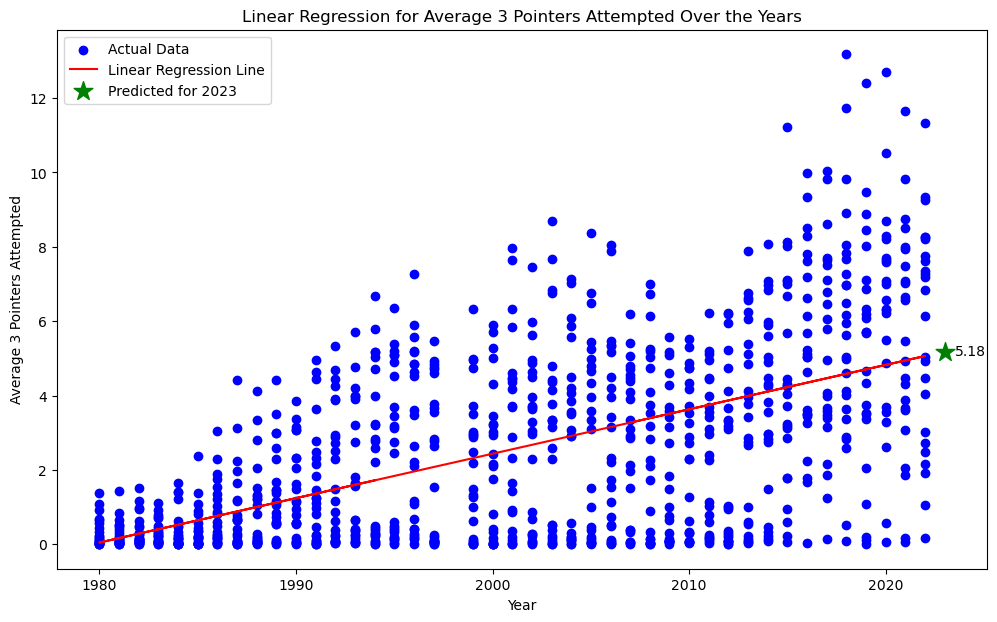

In [14]:
# replace missing values with 0
nba_all_stars_22['fg3a'].fillna(0, inplace=True)

# split the data into features and target variable
X = nba_all_stars_22[['year']]
y = nba_all_stars_22['fg3a']

# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create a linear regression model
model = LinearRegression()

# train the model
model.fit(X_train, y_train)

# predict the average number of 3-point attempts for 2023
year_2023 = [[2023]]
predicted_fg3a_2023 = model.predict(year_2023)

# print the predicted average 3-point attempts for 2023
print(f"Predicted Average 3 Pointers Attempted for 2023: {predicted_fg3a_2023[0]:.2f}")

# evaluate the model on the test set
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on Test Set: {mse:.3f}\n")

# plot the linear regression line
plt.figure(figsize=(12, 7))
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X_test, y_pred, color='red', label='Linear Regression Line')
plt.scatter(year_2023, predicted_fg3a_2023, color='green', marker='*', s=200, label='Predicted for 2023')

# add the predicted value slightly to the right of the marker
offset = 0.5
plt.text(year_2023[0][0] + offset, predicted_fg3a_2023[0], f'{predicted_fg3a_2023[0]:.2f}', ha='left', va='center')

# labels and title
plt.xlabel('Year')
plt.ylabel('Average 3 Pointers Attempted')
plt.title('Linear Regression for Average 3 Pointers Attempted Over the Years')
plt.legend()
plt.show()

For the Linear Regression model, the predicted value is 5.18 fg3a per game. Now let's see how accurate this value is.

In [9]:
# calculate the average 3 pointers attempted for 2023
nba_all_stars_23 = nba_all_stars_23[nba_all_stars_23['year'] == 2023]
actual_fg3a_2023 = nba_all_stars_23['fg3a'].mean()

# print the actual average 3-point attempts for 2023
print(f"Actual Average 3-Point Attempts for 2023 NBA All Stars: {actual_fg3a_2023:.2f}")

Actual Average 3-Point Attempts for 2023 NBA All Stars: 5.70


Now that we have found the actual average FG3As from the 2023 NBA All Stars, let's figure out the MSE (Mean Square Error) to see how accurate the Decision Tree model is. Note: Our MSE on the test data set was 5.005.

In [10]:
# convert to lists if needed
actual_3pt_attempts_2023_list = [actual_fg3a_2023]
predicted_3pt_attempts_2023_list = [predicted_fg3a_2023]

# calculate Mean Squared Error
mse_2023 = mean_squared_error(actual_3pt_attempts_2023_list, predicted_3pt_attempts_2023_list)

# print the MSE
print(f"Mean Squared Error for 2023: {mse_2023:.3f}")

Mean Squared Error for 2023: 0.264


### **2b** - Decision Trees Model

The code block below imputes missing values in the 'fg3a' column of the 'nba_all_stars' DataFrame with the median, then builds and trains a Decision Tree regression model using the 'year' column as a feature to predict the average number of 3-point attempts in 2023. The model is evaluated, and the predictions are visualized alongside the actual data using a scatter plot.

Predicted Average 3-Point Attempts for 2023 NBA All Stars: 5.58
Mean Squared Error on Test Set: 5.247



/Users/vjeyam/miniconda3/envs/mlModels/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


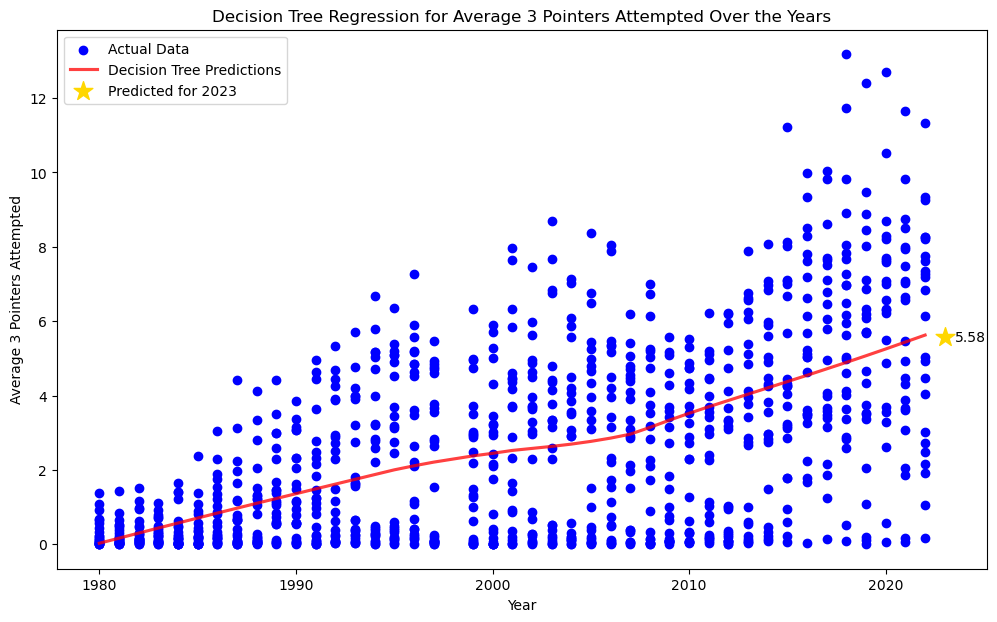

In [11]:
# replace missing values with '0'
nba_all_stars_22['fg3a'].fillna(0, inplace=True)

# split data into feature and target variable
X = nba_all_stars_22[['year']]
y = nba_all_stars_22['fg3a']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create a Decision Tree model
model = DecisionTreeRegressor(random_state=42)

# train the model
model.fit(X_train, y_train)

# predict the average number of 3-point attempts for 2023
year_2023 = [[2023]]
predicted_fg3a_2023 = model.predict(year_2023)

# print the predicted value
print(f"Predicted Average 3-Point Attempts for 2023 NBA All Stars: {predicted_fg3a_2023[0]:.2f}")

# evaluate the model on the test set (optional)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on Test Set: {mse:.3f}\n")

# plot the decision tree predictions
plt.figure(figsize=(12, 7))
plt.scatter(X, y, color='blue', label='Actual Data')
sns.regplot(data=nba_all_stars_22, x=X_test.squeeze(), y=y_pred, scatter=False, lowess=True, line_kws={'color': 'red', 'alpha': 0.75}, label='Decision Tree Predictions')
plt.scatter(year_2023, predicted_fg3a_2023, color='gold', marker='*', s=200, label='Predicted for 2023')

# add the predicted value slightly to the right of the marker
offset = 0.5
plt.text(year_2023[0][0] + offset, predicted_fg3a_2023[0], f'{predicted_fg3a_2023[0]:.2f}', ha='left', va='center')

# labels and title
plt.xlabel('Year')
plt.ylabel('Average 3 Pointers Attempted')
plt.title('Decision Tree Regression for Average 3 Pointers Attempted Over the Years')
plt.legend()
plt.show()

The decision tree predicted value is 5.58 fg3a per game. Now let's see how accurate this value is.

In [12]:
# calculate the average 3 pointers attempted for 2023
nba_all_stars_23 = nba_all_stars_23[nba_all_stars_23['year'] == 2023]
actual_fg3a_2023 = nba_all_stars_23['fg3a'].mean()

# print the actual average 3-point attempts for 2023
print(f"Actual Average 3-Point Attempts for 2023 NBA All Stars: {actual_fg3a_2023:.2f}")

Actual Average 3-Point Attempts for 2023 NBA All Stars: 5.70


Now that we have found the actual average FG3As from the 2023 NBA All Stars, let's figure out the MSE (Mean Square Error) to see how accurate the Decision Tree model is. Note: Our MSE on the test data set was 5.25. 

In [13]:
# convert to lists if needed
actual_3pt_attempts_2023_list = [actual_fg3a_2023]
predicted_3pt_attempts_2023_list = [predicted_fg3a_2023]

# calculate Mean Squared Error
mse_2023 = mean_squared_error(actual_3pt_attempts_2023_list, predicted_3pt_attempts_2023_list)

# print the MSE
print(f"Mean Squared Error for 2023: {mse_2023:.3f}")

Mean Squared Error for 2023: 0.015


### **2c** - Neural Networks